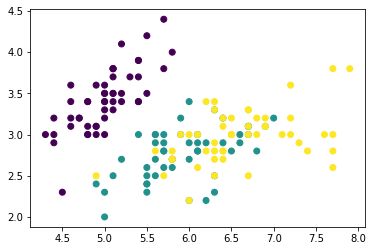

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :]  
y = iris.target

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

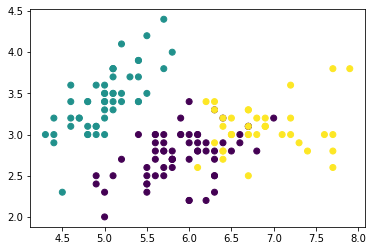

In [2]:
from sklearn.cluster import KMeans
#use kmeans with k=3 to obtain cluster lables
kmeans = KMeans(n_clusters=3).fit(X)
labels=kmeans.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

In [3]:
import pandas as pd
df=pd.DataFrame(X)
df[4]=labels  #add cluster label as a new column in X
#print(df)

In [4]:
from sklearn.model_selection import train_test_split
#GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb_seed=123
gnb_acc1=[]
gnb_acc2=[]
for j in range(100):
    gnb_seed+=100       
    x1_train,x1_test,y1_train,y1_test=train_test_split(X, y, test_size=0.95, random_state=gnb_seed) # without new feature
    x2_train,x2_test,y2_train,y2_test=train_test_split(df, y, test_size=0.95, random_state=gnb_seed) # with new feature
    
    gnbmodel = GaussianNB()
    gnbmodel.fit(x1_train, y1_train)
    y1_pred = gnbmodel.predict(x1_test)
    acc1=accuracy_score(y1_test,y1_pred)
    gnb_acc1.append(acc1)   
    
    gnbmodel.fit(x2_train, y2_train)
    y2_pred = gnbmodel.predict(x2_test)
    acc2=accuracy_score(y2_test,y2_pred)
    gnb_acc2.append(acc2)   

#print(gnb_acc1)
#print(gnb_acc2)


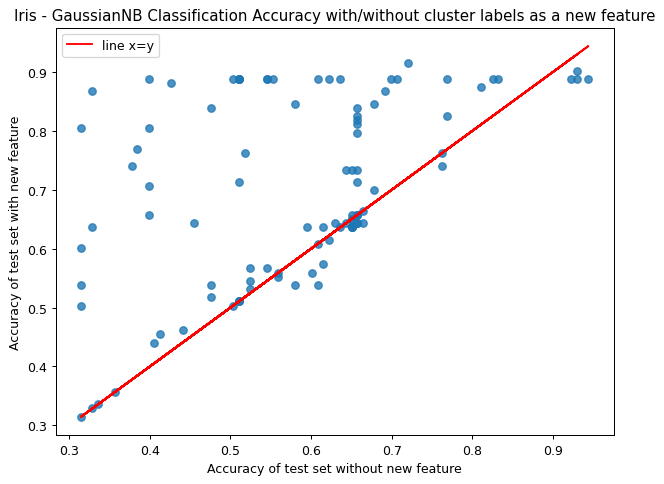

In [16]:
plt.figure(figsize=(8, 6), dpi=90)
plt.scatter(gnb_acc1,gnb_acc2,alpha=0.8)
plt.title("Iris - GaussianNB Classification Accuracy with/without cluster labels as a new feature")
plt.xlabel("Accuracy of test set without new feature")
plt.ylabel("Accuracy of test set with new feature")
plt.plot(gnb_acc1,gnb_acc1,c='red',label="line x=y")
plt.legend()
plt.show()

In [6]:
df_acc=pd.DataFrame(gnb_acc1)
df_acc[1]=gnb_acc2
print(df_acc)

           0         1
0   0.314685  0.601399
1   0.650350  0.636364
2   0.678322  0.846154
3   0.657343  0.839161
4   0.314685  0.804196
..       ...       ...
95  0.475524  0.538462
96  0.650350  0.636364
97  0.398601  0.657343
98  0.440559  0.461538
99  0.314685  0.538462

[100 rows x 2 columns]
